In [ ]:
Link github

## Introduction

Life expectancy data is a valuable tool for understanding population health and wellbeing. By examining patterns and trends in life expectancy, we can gain insight into the social, economic, and environmental factors that contribute to health outcomes. Life expectancy data can be used to identify diffrences in health outcomes between different groups, such as by race or socioeconomic status, and to inform policy and public health interventions aimed at improving population health. Through analyzing life expectancy data, we can better understand the complex relationships between individual behaviors and broader social determinants of health, and work towards creating healthier communities for all.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

First, lets read the dataset and take a look of the first 5 rows.

In [2]:
life_exp = pd.read_csv("https://raw.githubusercontent.com/wenceslaojs/private-datascience-proj/ef20d8570bfa29c37b6691d2b3e5304789a6724e/Life-Expectancy-Data-Updated.csv")
life_exp.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Countries belong to the following reigios.

In [3]:
life_exp['Region'].unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

Let's take a look on which reigion has the highest mean life expectency.

In [4]:
life_exp.groupby('Region').describe()['Life_expectancy'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,48.0,77.841667,2.414921,74.3,75.200,78.00,79.750,81.9
European Union,432.0,77.715046,3.238899,70.3,75.100,78.50,80.400,83.2
Rest of Europe,240.0,74.525417,4.679741,65.0,70.875,74.20,78.450,83.2
Middle East,224.0,73.975446,4.113554,60.7,72.400,74.30,76.325,82.2
South America,192.0,72.780729,3.544688,62.5,70.800,73.20,75.300,79.6
Central America and Caribbean,304.0,72.437500,4.435163,57.1,70.875,72.60,75.125,79.6
Oceania,176.0,69.517614,6.049905,59.0,65.900,68.45,71.050,82.4
Asia,432.0,69.454861,5.574821,55.8,65.700,68.85,73.600,83.8
Africa,816.0,57.847304,8.137411,39.4,52.075,57.05,62.000,76.1


Here is a bar chart of the means.

Text(0.5, 0, 'Life Expectancy')

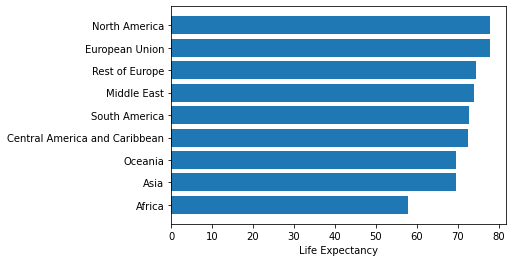

In [41]:
df2 = life_exp.groupby('Region')[['Life_expectancy']].mean().sort_values('Life_expectancy')
df2
plt.barh(df2.index, df2['Life_expectancy'])
plt.xlabel('Life Expectancy')

We can see from the data frame above that North America has the highest life expectency. This can be caused by many factors. In this report, I will discuss what might cause North America to have the highest life expectency by investigating the relationships of different variables. I know that correlation does not imply causation, but we are trying to find the probable causation, and we can always make assumptions. Rohrer says, "It is impossible to infer causation from correlation without background knowledge about the domain (e.g., Robins & Wasserman, 1999). However, the need to make certain assumptions should not be a reason to abandon observational research. In fact, experimental studies require assumptions as well."

Let filter the data to the columns that we will use

In [6]:
life_exp = life_exp[['Country', 'Region','Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'BMI', 'Incidents_HIV',
                    'GDP_per_capita', 'Schooling', 'Economy_status_Developed', 'Life_expectancy', 'Population_mln']]
life_exp.set_index(['Region', 'Country', 'Year'], inplace = True)
life_exp.head()

,,,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Schooling,Economy_status_Developed,Life_expectancy,Population_mln
Region,Country,Year,,,,,,,,,,,
Middle East,Turkiye,2015,11.1,13.0,105.8240,1.32,27.8,0.08,11006,7.8,0,76.5,78.53
European Union,Spain,2015,2.7,3.3,57.9025,10.35,26.0,0.09,25742,9.7,1,82.8,46.44
Asia,India,2007,51.5,67.9,201.0765,1.57,21.2,0.13,1076,5.0,0,65.4,1183.21
South America,Guyana,2006,32.8,40.5,222.1965,5.68,25.3,0.79,4146,7.9,0,67.0,0.75
Middle East,Israel,2012,3.4,4.3,57.9510,2.89,27.0,0.08,33995,12.8,1,81.7,7.91


First, let's see which country has the highest and the lowest mean life expectancy, and see different variables of these countries to see what factors that cause these countries to have the largest and the lowest life expectancy to use them on my analysis.

In [7]:
life_exp.loc[[life_exp['Life_expectancy'].idxmin()]]
print('The country that has the largest mean life expectancy is',life_exp.groupby('Country')['Life_expectancy'].mean().idxmax())
print('The country that has the smallest mean life expectancy is',life_exp.groupby('Country')['Life_expectancy'].mean().idxmin())

The country that has the largest mean life expectancy is Japan
The country that has the smallest mean life expectancy is Lesotho


Now we will take a look at the change of life expectancy of these two countries over the years.

In [8]:
life_exp.loc['Asia','Japan',:].sort_index()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Schooling,Economy_status_Developed,Life_expectancy,Population_mln
Year,,,,,,,,,,,
2000,3.3,4.5,72.9540,7.96,22.5,0.17,31431,10.7,1,81.1,126.84
2001,3.1,4.3,71.4415,8.01,22.5,0.17,31476,10.8,1,81.4,127.15
2002,3.0,4.1,70.1230,7.86,22.5,0.17,31416,10.9,1,81.6,127.45
2003,2.9,4.0,70.3060,7.82,22.5,0.17,31830,11.0,1,81.8,127.72
2004,2.8,3.9,68.9285,7.69,22.6,0.17,32515,11.1,1,82.0,127.76
2005,2.8,3.7,68.7680,7.98,22.6,0.17,33099,11.2,1,81.9,127.77
2006,2.7,3.6,66.5330,7.48,22.6,0.17,33532,11.2,1,82.3,127.85
2007,2.6,3.5,65.1360,7.28,22.6,0.17,33990,11.3,1,82.5,128.00
2008,2.5,3.4,64.0215,7.06,22.6,0.17,33558,11.4,1,82.6,128.06


In [9]:
life_exp.loc['Africa','Lesotho',:].sort_index()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Schooling,Economy_status_Developed,Life_expectancy,Population_mln
Year,,,,,,,,,,,
2000,70.0,106.9,568.7700,3.09,24.0,18.69,715,4.9,0,47.7,2.03
2001,70.5,108.8,605.5930,2.85,24.1,17.55,739,5.0,0,46.2,2.04
2002,71.2,110.7,642.4155,2.93,24.1,17.08,747,5.1,0,44.9,2.03
2003,72.2,112.7,629.8150,1.97,24.2,16.46,785,5.1,0,43.8,2.02
2004,73.0,114.5,617.2135,1.78,24.3,16.29,804,5.2,0,43.1,2.01
2005,74.0,116.1,604.6130,1.94,24.3,16.19,836,5.3,0,42.7,2.00
2006,74.5,116.5,592.0125,2.77,24.4,16.06,874,5.4,0,42.6,1.99
2007,73.8,114.3,579.4120,2.85,24.5,15.31,912,5.5,0,42.9,1.99
2008,77.1,113.0,569.1065,2.91,24.5,14.53,962,5.4,0,43.4,1.99


After looking at these data, it seems that infant deaths, under five deaths, adult mortality, BMI, Immunization, GDP per capita, schooling, and echonomy status all have an impact on life expectency. Here is a directed acyclic graph on what I think might caused Japan as a country and North America as a region to have the highest life expectency mean. Note that the data above does not show that alcohol consumption has an impact on life expectancy, but I assume that Lesotho is too poor to have a high alcohol consumption.

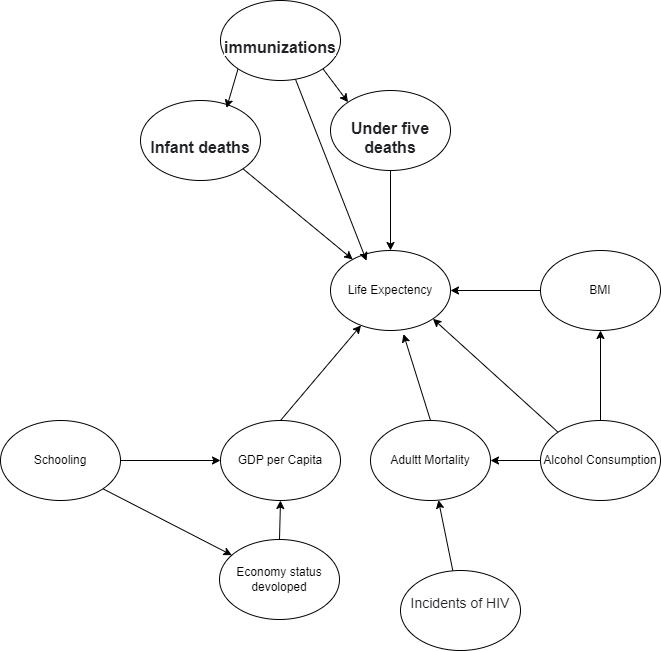

If there is an arrow from A to B, B is caused by A

Now I will take a look if there was a relationship between infant deaths and life expectency.

Text(0.5, 0, 'Infant and Under Five Deaths')

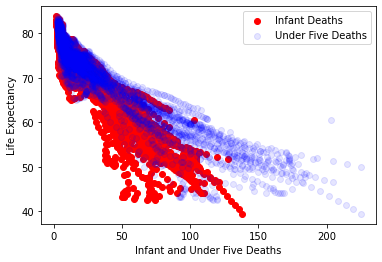

In [42]:
# print(life_exp.groupby('Infant_deaths')['Life_expectancy'].mean().shape)
# print(life_exp.groupby('Infant_deaths')['Infant_deaths'].mean().shape)
plt.scatter(life_exp['Infant_deaths'], life_exp['Life_expectancy'], color = 'r', alpha = 1, label = 'Infant Deaths')
plt.scatter(life_exp['Under_five_deaths'], life_exp['Life_expectancy'], color = 'b', alpha = 0.1, label = 'Under Five Deaths')
plt.legend()
plt.ylabel('Life Expectancy')
plt.xlabel('Infant and Under Five Deaths')

We can see from the scatter plot that as Infant deaths and under five years old deaths increase, so we can conclude that there is a negative correlation between Infant deaths and under five deaths, and life expectancy.

Now let's create a column that is equal to True if the population is higher than the median population and False otherwise to see if the population has an effect on life expectancy.

In [11]:
life_exp['above_median?'] = (life_exp['Population_mln'] > life_exp['Population_mln'].median())
life_exp.head()

,,,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Schooling,Economy_status_Developed,Life_expectancy,Population_mln,above_median?
Region,Country,Year,,,,,,,,,,,,
Middle East,Turkiye,2015,11.1,13.0,105.8240,1.32,27.8,0.08,11006,7.8,0,76.5,78.53,True
European Union,Spain,2015,2.7,3.3,57.9025,10.35,26.0,0.09,25742,9.7,1,82.8,46.44,True
Asia,India,2007,51.5,67.9,201.0765,1.57,21.2,0.13,1076,5.0,0,65.4,1183.21,True
South America,Guyana,2006,32.8,40.5,222.1965,5.68,25.3,0.79,4146,7.9,0,67.0,0.75,False
Middle East,Israel,2012,3.4,4.3,57.9510,2.89,27.0,0.08,33995,12.8,1,81.7,7.91,True


In [12]:
life_exp.reset_index('Region').groupby(['above_median?'])['Life_expectancy'].describe()
life_exp.pivot_table('Life_expectancy', index = 'above_median?', columns = 'Region')

Region,Africa,Asia,Central America and Caribbean,European Union,Middle East,North America,Oceania,Rest of Europe,South America
above_median?,,,,,,,,,
False,58.279885,69.616429,73.097845,76.779126,76.112389,NaN,68.421519,75.332164,71.331250
True,57.525641,69.377397,70.309722,78.568142,71.800000,77.841667,79.138889,72.526087,73.505469


We can see here that the mean of life expectancy for each region has nothing to do with the population, so I will not consider population, but we can see that Africa has a very low life expectancy. I assume that this is caused by poverty rate, so next I will anylize the relationship between life expectency and the things that has to do with poverty rate.

In [13]:
life_exp.groupby('Economy_status_Developed')['Life_expectancy'].mean()

Economy_status_Developed
0    66.341725
1    78.505743
Name: Life_expectancy, dtype: float64

We can see that the mean of life expectancy for devoloped contries is higher. Now let's create a line plot showing the relationship between GDP per capita and life expectency for devoloped and undevoloped countries. Note that I am grouping by the x axis to take 1 observation per input to make the graph looks more beautiful.

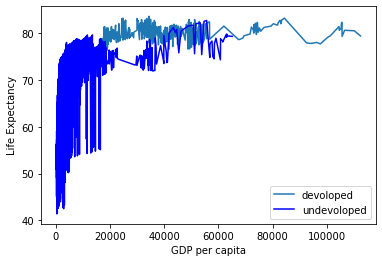

In [14]:
devoloped = life_exp[life_exp['Economy_status_Developed'] == 1] #TODO: GO to the TA
undevoloped = life_exp[life_exp['Economy_status_Developed'] == 0]
x = np.linspace(100, 112000, 592)
plt.plot(devoloped.groupby('GDP_per_capita')['GDP_per_capita'].mean(),devoloped.groupby('GDP_per_capita')['Life_expectancy'].mean(), label = 'devoloped')
plt.plot(undevoloped.groupby('GDP_per_capita')['GDP_per_capita'].mean(),undevoloped.groupby('GDP_per_capita')['Life_expectancy'].mean(), color = 'b', label = 'undevoloped')
plt.xlabel('GDP per capita'); plt.ylabel('Life Expectancy')
plt.legend()

We can see here that there is a relationship between econmmy status and GDP per capita(devoloped countries has higher GDP per capita). Also, life expectancy increase as GDP per capita increase. Now we will see if there is a relationship between schooling(Average years that people aged 25+ spent in formal education) and GDP per capita.

Text(0, 0.5, 'GDP_per_capita')

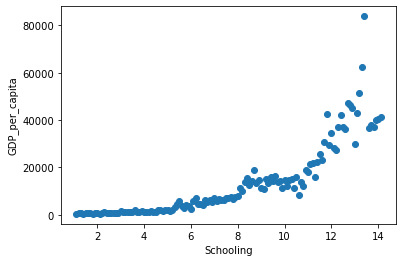

In [15]:
plt.scatter(life_exp.groupby('Schooling')['Schooling'].mean(), life_exp.groupby('Schooling')['GDP_per_capita'].mean())
plt.xlabel('Schooling'); plt.ylabel('GDP_per_capita')

We can see that there is a relationship between Schooling and GDP per capita. I am expecting that there is a causal relationship, such that the relationship between schooling and GDP per capit is direct, and it does not pass by another variable, but further analysis need to be done in order to conclude that there is a causal relationship.

At this point we proved that there is a relationship between GDP per capita and life expectancy, which I am expecting to be direct, and (Infant deaths, and under five deaths) and life expectancy. 

Now we will walk through the last part of my directed acyclic graph to see the relationship between life expectancy and factors related to health.

First, I am not sure about the causal effect between adult mortality and alcohol consumption, so lets see if there was a relationship between them, and then see if the alcohol consumption differ by economy status.

Text(0, 0.5, 'Adult_mortality')

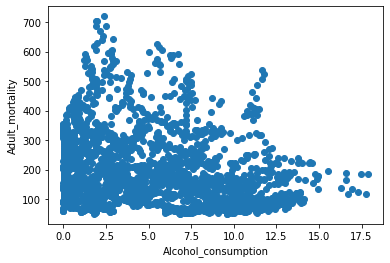

In [16]:
plt.scatter(life_exp['Alcohol_consumption'], life_exp['Adult_mortality'])
plt.xlabel('Alcohol_consumption'); plt.ylabel('Adult_mortality')

But maybe there was no effect because poor countries can not afford alcohol, so let's color them by country.

Text(0, 0.5, 'Adult_mortality')

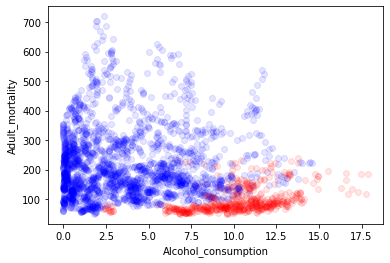

In [17]:
plt.scatter(devoloped['Alcohol_consumption'], devoloped['Adult_mortality'], color = 'r', alpha = 0.1)
plt.scatter(undevoloped['Alcohol_consumption'], undevoloped['Adult_mortality'], color = 'b', alpha = 0.1)
plt.xlabel('Alcohol_consumption'); plt.ylabel('Adult_mortality')

This graph shows that lower alcohol consumption is associated with higher adult mortality! As I said, I expect that countries that have a low number of alcohol consuption, also have lower GDP per capita which affect adult mortality.

Now I will filter the data to countries that have higher amount alcohol consumption than the total upper quantile.

Text(0, 0.5, 'Adult_mortality')

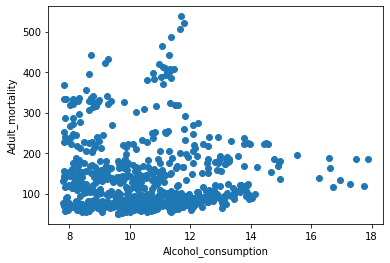

In [18]:
alco = life_exp[life_exp['Alcohol_consumption'] > np.quantile(life_exp['Alcohol_consumption'], 0.75)]
plt.scatter(alco['Alcohol_consumption'], alco['Adult_mortality'])
plt.xlabel('Alcohol_consumption'); plt.ylabel('Adult_mortality')

It looks like there is no significant relationship between alcohol consumption and adult mortality. Now lets see if there was a relationship between alcohol consumption and BMI.

Text(0, 0.5, 'BMI')

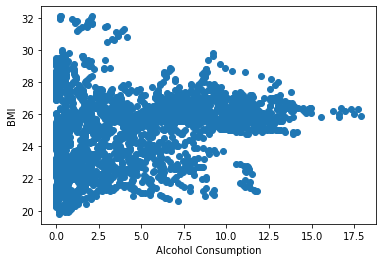

In [43]:
plt.scatter(life_exp['Alcohol_consumption'], life_exp['BMI'])
plt.xlabel('Alcohol Consumption')
plt.ylabel('BMI')

This graph looks weird because there is a high variability in the data for countries that have low alcohol consumption and low variability in countries that have high alcohol consumption, but it does not lool like there is a relationship.

The last question regarding alcohol consumption is "is there a relationship between alcohol consumption and Life expectancy?"

Text(0, 0.5, 'Life Expectancy')

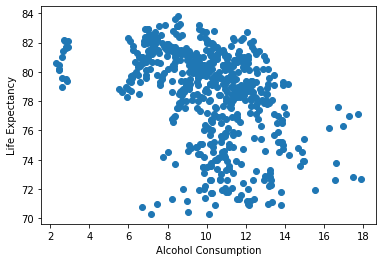

In [44]:
plt.scatter(devoloped['Alcohol_consumption'], devoloped['Life_expectancy'])
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')

This plot shows that the countries that have medium alcohol consumption have high life expectancy, and countries that have high and low alcohol consumption have lower life expectancy. I think that is because there are other factors like BMI that are affecting life expectancy for countries that have low alcohol consumptopn. To sum up, the graph does not seem to have significant relationship between alcohol consumption and life expectancy (In general). 

Now lets see if there was a relationship between BMI and life expectancy, but first lets take a look at the top 10 countries that have highest BMI in 2015

In [21]:
life_exp.loc[:,:,2015].sort_values('BMI', ascending=False)[:10]

Infant_deaths  \
Region                        Country                                
Oceania                       Samoa                           15.9   
                              Tonga                           10.7   
                              Kiribati                        44.7   
Central America and Caribbean St. Lucia                       19.5   
Oceania                       Micronesia, Fed. Sts.           24.2   
Middle East                   Kuwait                           7.5   
Africa                        Egypt, Arab Rep.                19.8   
Middle East                   Qatar                            6.7   
                              Jordan                          15.0   
Central America and Caribbean Belize                          13.2   

                                                     Under_five_deaths  \
Region                        Country                                    
Oceania                       Samoa                               18.6   
                              Tonga                               12.4   
                              Kiribati                            57.6   
Central America and Caribbean St. Lucia                           21.9   
Oceania                       Micronesia, Fed. Sts.               28.9   
Middle East                   Kuwait                               8.8   
Africa                        Egypt, Arab Rep.                    23.3   
Middle East                   Qatar                                7.8   
                              Jordan                              17.5   
Central America and Caribbean Belize                              15.3   

                                                     Adult_mortality  \
Region                        Country                                  
Oceania                       Samoa                         111.9490   
                              Tonga                         134.0135   
                              Kiribati                      198.4490   
Central America and Caribbean St. Lucia                     136.3935   
Oceania                       Micronesia, Fed. Sts.         164.8710   
Middle East                   Kuwait                         58.1365   
Africa                        Egypt, Arab Rep.              149.5290   
Middle East                   Qatar                          56.2695   
                              Jordan                        109.9420   
Central America and Caribbean Belize                        174.4925   

                                                     Alcohol_consumption  \
Region                        Country                                      
Oceania                       Samoa                                 2.10   
                              Tonga                                 0.23   
                              Kiribati                              0.35   
Central America and Caribbean St. Lucia                             9.23   
Oceania                       Micronesia, Fed. Sts.                 1.59   
Middle East                   Kuwait                                0.00   
Africa                        Egypt, Arab Rep.                      0.18   
Middle East                   Qatar                                 1.03   
                              Jordan                                0.30   
Central America and Caribbean Belize                                6.71   

                                                      BMI  Incidents_HIV  \
Region                        Country                                      
Oceania                       Samoa                  32.1           0.17   
                              Tonga                  32.1           0.17   
                              Kiribati               30.0           0.17   
Central America and Caribbean St. Lucia              29.8           0.40   
Oceania                       Micronesia, Fed. Sts.  29.6           0.17   
Middle East  

We can see that these countries have a high BMI and a high life expectancy as well! Lets use a line plot to see if there is really relationship between BMI and life expectancy.

Text(0, 0.5, 'Life Expectancy')

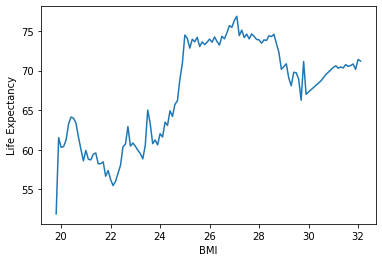

In [45]:
plt.plot(life_exp.groupby('BMI')['BMI'].mean(), life_exp.groupby('BMI')['Life_expectancy'].mean())
plt.xlabel('BMI');plt.ylabel('Life Expectancy')

This plot clearly shows that there is a relationship between life expectancy and BMI, highest life expectancy is around 27, which is a healthy BMI. However, BMI is not an accurate measure for body fat. In my openion, it would be better if we compared the average body fat against life expectancy to show if obesity affect life expectancy.

Lastly, we will see if there is a relationship between life expectancy and adult mortality, but this time I will do it with avereage adult mortality and life expectancy for each country over the years.

In [35]:
ave_life = life_exp.groupby('Country')[['Adult_mortality','Life_expectancy']].mean()
ave_life.head()

,Adult_mortality,Life_expectancy
Country,,
Afghanistan,265.804969,59.65625
Albania,83.132969,75.95000
Algeria,113.439281,73.78750
Angola,297.844063,52.82500
Antigua and Barbuda,142.478813,75.35000


Text(0, 0.5, 'Life Expectancy')

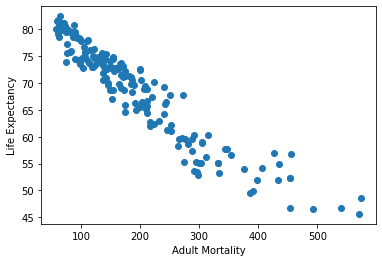

In [46]:
plt.scatter(ave_life['Adult_mortality'],ave_life['Life_expectancy'])
plt.xlabel('Adult Mortality');plt.ylabel('Life Expectancy')

There is a clear relationship between life expectancy and adult mortality, as adult mortality increases, life expectancy decreases.

## Conclusion

In conclusion, we found that there was different economic and health factors that affecting life expectancy. In terms of health, we found that BMI and adult mortality is the most important factor that is affecting life expectancy. In terms of economy, we found that schooling and economy status are correlated with GDP per capita, which is affecting life expectancy. Also we found that infant deaths and under five deaths are correlated with life expectancy. As I mentioned above, correlation does not imply causation, but knowing the relationship between the variables tells you that there might be a cause and effect relationship if there was a relationship. In this report, we assumed that there was a causal relationship, but further analysis need to be done in order to conclude that there is a causal relationship.

## Refrences

Lasha Gochiashvili. (2023). Life Expectancy (WHO) Fixed [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/3065197

Rohrer, J. M. (2017). Thinking clearly about correlations and causation: Graphical causal models for observational data. https://doi.org/10.31234/osf.io/t3qub 